

# Project: Investigate IMDB movies
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The data I've selected contains information about movies from tmdb, including rating, revenues, genres, etc..
The two questions I'm going to investigate, are:1- Is the average runtime higher with more vote counts? 2-Is the popularity increased over the years?
In the first question I'm going to take the mean of the vote counts and create a dataframe, then take the runtime for the dataframe I created to compare it with the original dataframe. 
The second question I created two dataframes to split the years (before 1990, 1990 and after) then I compared the popularity for the two dataframes. 


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



### Data Cleaning 

I'm gonna see the null values in the dataset first 

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are too many columns I don't need and there are missing data on them so I'm gonna delete them, budget because of the zeros values alongside revenue, also homepage, tagline, keywords, production_companies, casts, directors, imdb_id, and overview. 

In [7]:
df.drop(['budget', 'revenue', 'homepage', 'tagline', 'keywords', 'production_companies', 'cast', 'director', 'imdb_id', 'overview'], axis=1, inplace=True)

I'm going to delete the null values in genres since it considered to be less than 2% of the data and it won't affect it. 

In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   popularity      10843 non-null  float64
 2   original_title  10843 non-null  object 
 3   runtime         10843 non-null  int64  
 4   genres          10843 non-null  object 
 5   release_date    10843 non-null  object 
 6   vote_count      10843 non-null  int64  
 7   vote_average    10843 non-null  float64
 8   release_year    10843 non-null  int64  
 9   budget_adj      10843 non-null  float64
 10  revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1016.5+ KB


Now I'll fill the zero values in budget_adj and revenue_adj with the mean 

In [34]:
df = df.mask(df == 0).fillna(df.mean())

In [35]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,102.420098,217.813705,5.973974,2001.315595,2.679198e+07,7.992297e+07
std,91977.394803,1.000986,30.827363,576.155351,0.934260,12.813298,3.053106e+07,1.366870e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10589.500000,0.208253,90.000000,17.000000,5.400000,1995.000000,1.758827e+07,5.147332e+07
50%,20558.000000,0.384555,99.000000,38.000000,6.000000,2006.000000,1.758827e+07,5.147332e+07
75%,75182.000000,0.715349,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,5.147332e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 Is the average runtime higher with more vote counts? 

Now I'm going to see describtion of the dataset to understand more what can I do 

In [9]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,91977.394803,1.000986,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.500000,0.208253,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20558.000000,0.384555,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75182.000000,0.715349,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I'll take the vote_count/vote_average to make it more reliable if I wanna use the vote_average 

In [31]:
def dev_fun (a, b):
    return a/b 
vote_average = df['vote_average']
vote_count = df['vote_count']
print(dev_fun(vote_average, vote_count))

0        0.001169
1        0.001148
2        0.002540
3        0.001417
4        0.002477
           ...   
10861    0.672727
10862    0.285000
10863    0.590909
10864    0.245455
10865    0.100000
Length: 10843, dtype: float64


I'll make a box plot and histogram for the runtime to see through it clearly 

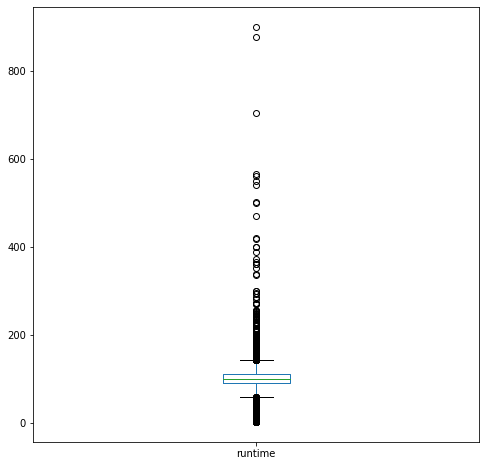

In [47]:
df['runtime'].plot(kind = 'box', figsize = (8, 8)); 

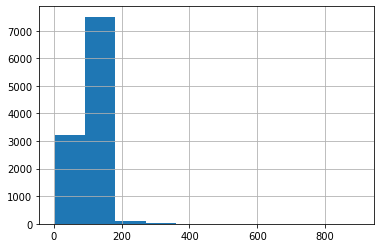

In [49]:
df['runtime'].hist();

I'm going to take vote counts that are higher than the mean 217 to know what are the characteristics associated with them 

In [10]:
high_votes = df.query('vote_count >217')
high_votes.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2.088000e+03,2.088000e+03
mean,55279.947797,1.807122,111.007184,930.668103,6.429502,2004.410920,5.533817e+07,2.068528e+08
std,82120.837615,1.781829,24.835124,1041.712498,0.738107,10.252758,5.234673e+07,2.633065e+08
min,5.000000,0.040858,3.000000,218.000000,3.100000,1960.000000,0.000000e+00,0.000000e+00
25%,2293.500000,0.936457,96.750000,325.000000,5.900000,2000.000000,1.673199e+07,4.369151e+07
50%,10989.000000,1.319242,107.000000,536.000000,6.400000,2007.000000,3.881326e+07,1.226685e+08
75%,72365.250000,2.070191,122.000000,1070.250000,7.000000,2012.000000,8.000000e+07,2.661548e+08
max,347969.000000,32.985763,705.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


Now i'll take the mean for them to compare it with the original mean 

In [11]:
hivot_mean = high_votes.mean()
hivot_mean 

id              5.527995e+04
popularity      1.807122e+00
runtime         1.110072e+02
vote_count      9.306681e+02
vote_average    6.429502e+00
release_year    2.004411e+03
budget_adj      5.533817e+07
revenue_adj     2.068528e+08
dtype: float64

In [12]:
orig_mean = df.mean()
orig_mean 

id              6.586849e+04
popularity      6.474559e-01
runtime         1.021375e+02
vote_count      2.178137e+02
vote_average    5.973974e+00
release_year    2.001316e+03
budget_adj      1.758827e+07
revenue_adj     5.147332e+07
dtype: float64

after seeing the characteristics I'm gonna compare just the runtime. 

In [13]:
hivot_run = hivot_mean['runtime']
hivot_run

111.00718390804597

In [14]:
orig_run = orig_mean['runtime']
orig_run

102.1375080697224

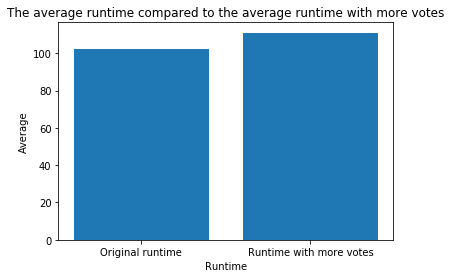

In [15]:
plt.bar(['Original runtime', 'Runtime with more votes'], [orig_run, hivot_run] )
plt.title('The average runtime compared to the average runtime with more votes')
plt.xlabel('Runtime')
plt.ylabel('Average');

As we can see from the histogram, more runtimes associated with more votes clearly. 

### Research Qurstion 2 Is the popularity increased over the years? 

First, I'm going to split the data into <1990 and >=1999 so we can see if the popularity increased after the year 1990  

In [16]:
df_yea1 = df.query('release_year >=1990')

In [17]:
df_yea2 = df.query('release_year <1990')

Now I'll sum the popularity for the dataframes I've created

In [30]:
df_popu1 = df_yea1['popularity'].sum()
df_popu1

6063.868964999999

In [54]:
df_popu2 = df_yea2['popularity'].sum()
df_popu2

956.4951959999999

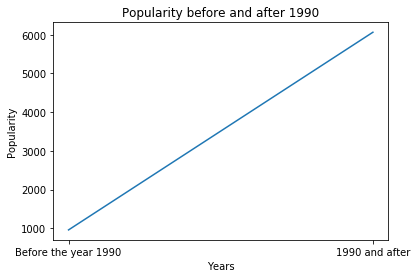

In [84]:
plt.plot( ['Before the year 1990', '1990 and after'], [956.4951959999999, 6063.868964999999 ])
plt.title("Popularity before and after 1990")
plt.xlabel("Years")
plt.ylabel("Popularity");

I used line plot but maybe is not the best for this so I'll make another visualization using histogram 

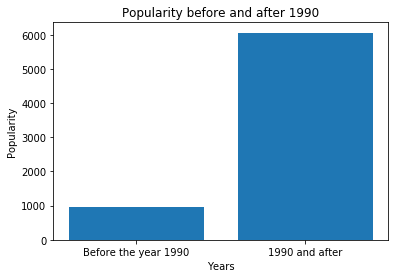

In [83]:
plt.bar(["Before the year 1990", "1990 and after"], [df_popu2, df_popu1])
plt.title("Popularity before and after 1990")
plt.xlabel("Years")
plt.ylabel("Popularity");

As is shown in the histogram, there is a huge increase in the popularity in the year 1990 and after 

<a id='conclusions'></a>
## Conclusions

First of all, I dropped some columns that I didn't need, and after exploring the data I came with two questions that I wanted the answer for them. The first question Is the average runtime higher with more vote counts? and as we see in this plot. the average runtime is higher with more vote counts 




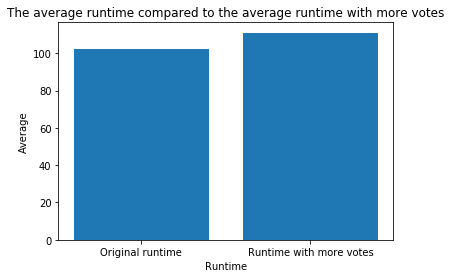

In [79]:
plt.bar(['Original runtime', 'Runtime with more votes'], [orig_run, hivot_run] )
plt.title('The average runtime compared to the average runtime with more votes')
plt.xlabel('Runtime')
plt.ylabel('Average');

The second question is the popularity increased over the years? and for this question, I divided the years before and after 1990, and as it is clearly shown in the histogram, the popularity increased dramatically in 1990 and after.


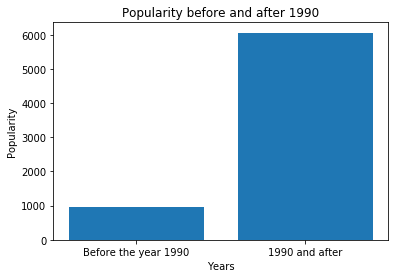

In [82]:
plt.bar(["Before the year 1990", "1990 and after"], [df_popu2, df_popu1])
plt.title("Popularity before and after 1990")
plt.xlabel("Years")
plt.ylabel("Popularity");

The limitations of this dataset that there a lot of missing data that I cannot fill with the mean for example, because they are not numerical data, such as cast, directors, and also the revenue and budget have zeros and that could mess up the analysis. There was two ids in this dataset, the imdb_id has missing values so I deleted the whole column. 
